# Análise do dados de Aposentadorias concedidas por anos de serviço.
    


# 1. Introdução
 - Informação sobre o dataset: Este dataset foi retirado do site do Portal Brasileiro de Dados Abertos (fonte abaixo). 
 Ele contém informações sobre os benefícios concedidos por anos de serviço do beneficiário, grupos de espécie específicos, sexo do beneficiário, clientela e ano da Data de Despacho do Benefício (DDB). Não inclui pensões alimentícias, desdobramentos de pensões por morte nem benefícios de prestação única. Considera apenas espécies de 'aposentadorias por tempo de contribuição'. <br>
Os dados compreendem o período de 1996 até 2016.<br>
Infelizmente não encontrei um dicionário para descrever melhor os atributos. <br>   
    Fonte dos dados: http://dados.gov.br/dataset/aposentadorias-concedidas-por-anos-de-servico <br>
    
# 2. Bibliotecas     
 - Importação das Bibliotecas utilizadas <br>
 - Importação do Dataset <br>
    
# 3. Conhecendo um pouco os dados   
 - Shape do dataset  <br>
 - Atributos do Dataset  <br>
 - Olhando as primeiras linhas <br>
 - Atributos do Dataset <br>
 - Verificando valores nulos  <br>
 - Verificando valores N/A (não disponível) <br>
 - Olhando os tipos dos dados e formato dos dados <br>
 - Verificando os valores únicos <br>


# 4. Explorandos os dados
- Verificando os Totais por Exercicio. <br>
- Plotando a distribuição dos valores por Exercício. <br>
- Plotando a proporção dos valores por Exercício <br>
- Plotando alguns gráficos com diferentes agrupamentos. <br>

# ** Vamos começar a brincadeira! **

# 1. Introdução:
<h3>Contexto</h3>

    ** O principal objetivo deste notebook é praticar o uso do python para análise e visualização de dados utilizando o Plotly. **

O conjunto de dados original contém 3.880 linhas com 4 atributos. 
<h3>Conteúdo</h3>

Realizei plots de alguns gráficos com o objetivo de aprender um pouco mais sobre a biblioteca de gráficos interativa Plotly: https://plot.ly/python/



# 2. Bibliotecas     
2.1 - Importação das Bibliotecas utilizadas <br>
2.2 - Importação do Dataset <br>

In [1]:
# Carregando das bibliotecas
import pandas as pd 
import warnings
import numpy as np
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tools


In [2]:
# Importando os dados.
df_aposentadorias = pd.read_csv('./base_dados/CON06-Aposentadorias_concedidas_anos_servico.csv',  encoding = "ISO-8859-1", decimal=",", na_values='-', skipfooter=1, engine='python')


 
# 3. Conhecendo um pouco os dados   
- Shape do dataset original <br>
- Atributos do Dataset <br>
- Remove colunas que não serão utilizadas <br>
- Olhando os tipos dos dados e formato dos dados <br>
- Olhando as primeiras linhas antes das conversões <br>
- Convertendo os tipos de algumas colunas  <br>
- Olhando os tipos dos dados e formato dos dados após as conversões <br>
- Verificando valores nulos <br>
- Verificando valores N/A (não disponível) <br>
- Verificando os valores únicos <br>
- Observando algumas medidas <br>


In [3]:
# Shape do dataset original
df_aposentadorias.shape

(3879, 8)

In [4]:
# Atributos do Dataset
df_aposentadorias.columns

Index(['Ano', 'Espécie', 'Anos de Serviço do Segurado', 'Sexo', 'Clientela',
       'Qte Benefícios Concedidos', 'Vlr Benefícios Concedidos (R$)',
       'Vlr Benef Concedidos (Mil R$)'],
      dtype='object')

In [5]:
# Remove colunas que não serão utilizadas
df_aposentadorias.drop(columns=['Vlr Benef Concedidos (Mil R$)'], inplace=True)

In [6]:
# Olhando os tipos dos dados e formato dos dados
df_aposentadorias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3879 entries, 0 to 3878
Data columns (total 7 columns):
Ano                               3879 non-null int64
Espécie                           3879 non-null object
Anos de Serviço do Segurado       3879 non-null object
Sexo                              3879 non-null object
Clientela                         3879 non-null object
Qte Benefícios Concedidos         3879 non-null int64
Vlr Benefícios Concedidos (R$)    3879 non-null float64
dtypes: float64(1), int64(2), object(4)
memory usage: 212.2+ KB


In [7]:
# Olhando as primeiras linhas antes das conversões
df_aposentadorias.head()

,Ano,Espécie,Anos de Serviço do Segurado,Sexo,Clientela,Qte Benefícios Concedidos,Vlr Benefícios Concedidos (R$)
0,1996,42-Ap Tempo Contrib Lops,Até 15 Anos,Masculino,Urbana,0,0.00
1,1996,42-Ap Tempo Contrib Lops,Até 15 Anos,Feminino,Urbana,0,0.00
2,1996,46-Ap Tempo Contrib Especial,Até 15 Anos,Masculino,Urbana,48,26860.22
3,1996,46-Ap Tempo Contrib Especial,Até 15 Anos,Feminino,Urbana,0,0.00
4,1996,Outras Ap Tempo Contrib,Até 15 Anos,Masculino,Urbana,41,18272.77


In [8]:
# Convertendo os tipos de algumas colunas.
df_aposentadorias['Anos de Serviço do Segurado'] = df_aposentadorias['Anos de Serviço do Segurado'] .astype('category')
df_aposentadorias['Espécie'] = df_aposentadorias['Espécie'] .astype('category')
df_aposentadorias['Sexo'] = df_aposentadorias['Sexo'] .astype('category')
df_aposentadorias['Clientela'] = df_aposentadorias['Clientela'] .astype('category')
df_aposentadorias['Ano'] = df_aposentadorias['Ano'].astype('int', copy=False)

In [9]:
# Olhando os tipos dos dados e formato dos dados após as conversões
df_aposentadorias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3879 entries, 0 to 3878
Data columns (total 7 columns):
Ano                               3879 non-null int64
Espécie                           3879 non-null category
Anos de Serviço do Segurado       3879 non-null category
Sexo                              3879 non-null category
Clientela                         3879 non-null category
Qte Benefícios Concedidos         3879 non-null int64
Vlr Benefícios Concedidos (R$)    3879 non-null float64
dtypes: category(4), float64(1), int64(2)
memory usage: 107.9 KB


In [10]:
# Verificando valores nulos
df_aposentadorias.isnull().sum()

Ano                               0
Espécie                           0
Anos de Serviço do Segurado       0
Sexo                              0
Clientela                         0
Qte Benefícios Concedidos         0
Vlr Benefícios Concedidos (R$)    0
dtype: int64

In [11]:
# Verificando valores N/A (não disponível)
df_aposentadorias.isna().sum()

Ano                               0
Espécie                           0
Anos de Serviço do Segurado       0
Sexo                              0
Clientela                         0
Qte Benefícios Concedidos         0
Vlr Benefícios Concedidos (R$)    0
dtype: int64

In [12]:
# Verificando os valores únicos
df_aposentadorias.nunique()

Ano                                 21
Espécie                              3
Anos de Serviço do Segurado         28
Sexo                                 2
Clientela                            2
Qte Benefícios Concedidos          907
Vlr Benefícios Concedidos (R$)    3000
dtype: int64

In [13]:
# Observando algumas medidas
df_aposentadorias.describe()

,Ano,Qte Benefícios Concedidos,Vlr Benefícios Concedidos (R$)
count,3879.000000,3879.000000,3.879000e+03
mean,2005.869812,1353.958237,1.633005e+06
std,6.170127,6659.709991,9.881115e+06
min,1996.000000,0.000000,-1.754886e+05
25%,2000.000000,1.000000,6.780000e+02
50%,2005.000000,7.000000,9.135360e+03
75%,2011.000000,103.500000,1.311362e+05
max,2016.000000,127300.000000,2.778605e+08



# 4. Explorandos os dados
- Visão Geral por Ano <br>
- Explorando o Atributo Sexo <br>
- Explorando o Atributo Clientela <br>
- Explorando o Atributo "Anos de Serviço do Segurado" <br>
- Explorando o Atributo Espécie <br>

<h3> Visão Geral por Ano</h3>

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



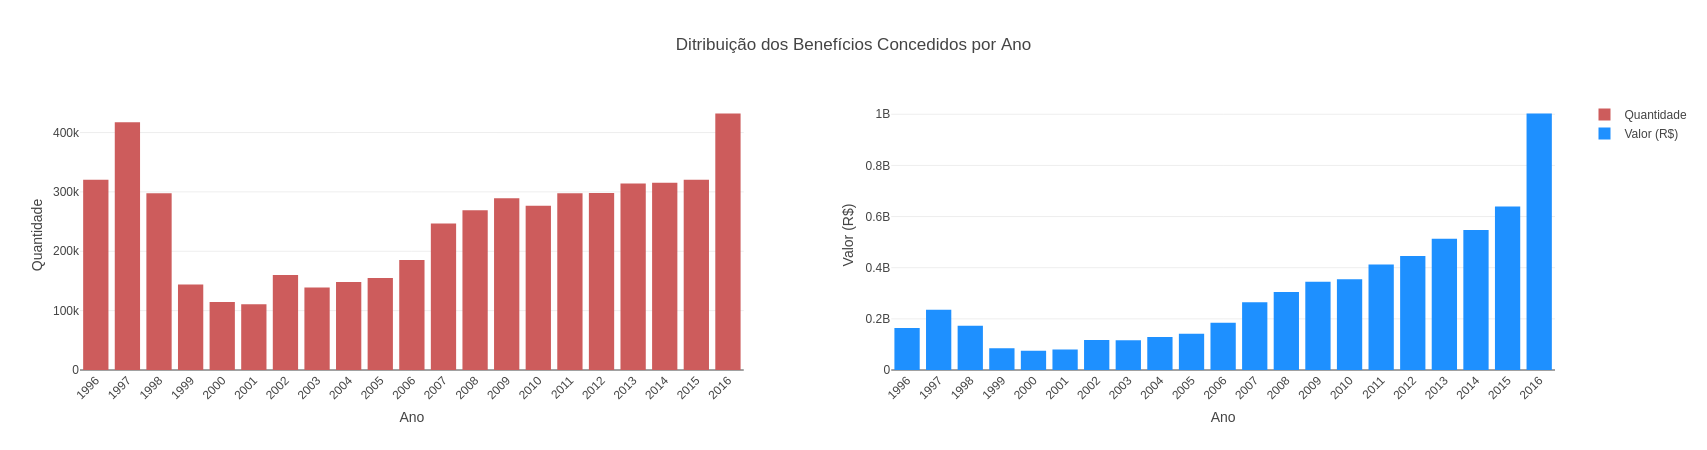

In [14]:
# Olhando a Quantidade Benefícios Concedidos por Ano

trace1 = go.Bar(
            x = df_aposentadorias.groupby('Ano').sum()['Qte Benefícios Concedidos'].index.values,
            y = df_aposentadorias.groupby('Ano').sum()['Qte Benefícios Concedidos'].values,
            name='Quantidade',
            marker=dict( color='indianred'), 
            )


# Valor dos Benefícios Concedidos (R$)
trace2 = go.Bar(
            x = df_aposentadorias.groupby('Ano').sum()['Vlr Benefícios Concedidos (R$)'].index.values,
            y = df_aposentadorias.groupby('Ano').sum()['Vlr Benefícios Concedidos (R$)'].values,
            name='Valor (R$)',
            marker=dict(color='dodgerblue'),            
            )


fig = tools.make_subplots(rows=1, cols=2)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

fig['layout'].update(title='Ditribuição dos Benefícios Concedidos por Ano', 
                         yaxis=dict(title='Quantidade'), 
                         yaxis2=dict(title='Valor (R$)'), 
                         xaxis1=dict(title='Ano', tickmode='linear' , tickangle=-45), 
                         xaxis2=dict(title='Ano', tickmode='linear' , tickangle=-45)
                    )
py.iplot(fig)

<h3>Explorando o Atributo SEXO</h3>

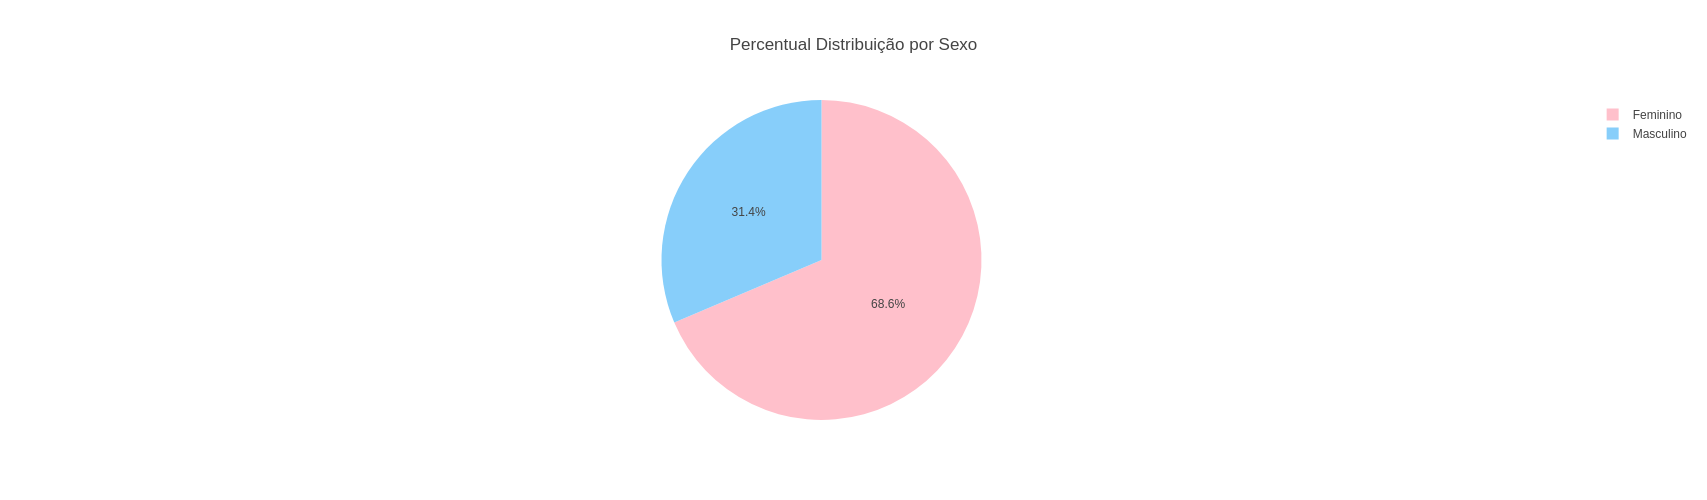

In [15]:
# Explorando o Atributo Sexo

df_masculino = df_aposentadorias[df_aposentadorias["Sexo"]== 'Masculino']
df_feminino = df_aposentadorias[df_aposentadorias["Sexo"]== 'Feminino']


# Grafico 1 - Percentual de Distribuição por Sexo - Pizza
labels = df_aposentadorias['Sexo']
values = df_aposentadorias.groupby('Sexo').sum()['Qte Benefícios Concedidos']

trace = go.Pie(labels=labels, values=values,
              marker=dict(colors=['lightskyblue', 'pink']), 
              )

layout = go.Layout(yaxis=dict(title='Sexo'),xaxis=dict(title='Qtd') ,title='Percentual Distribuição por Sexo',autosize=False,     width=800,     height=500 )

fig = go.Figure(data=[trace], layout=layout, )

py.iplot(fig)


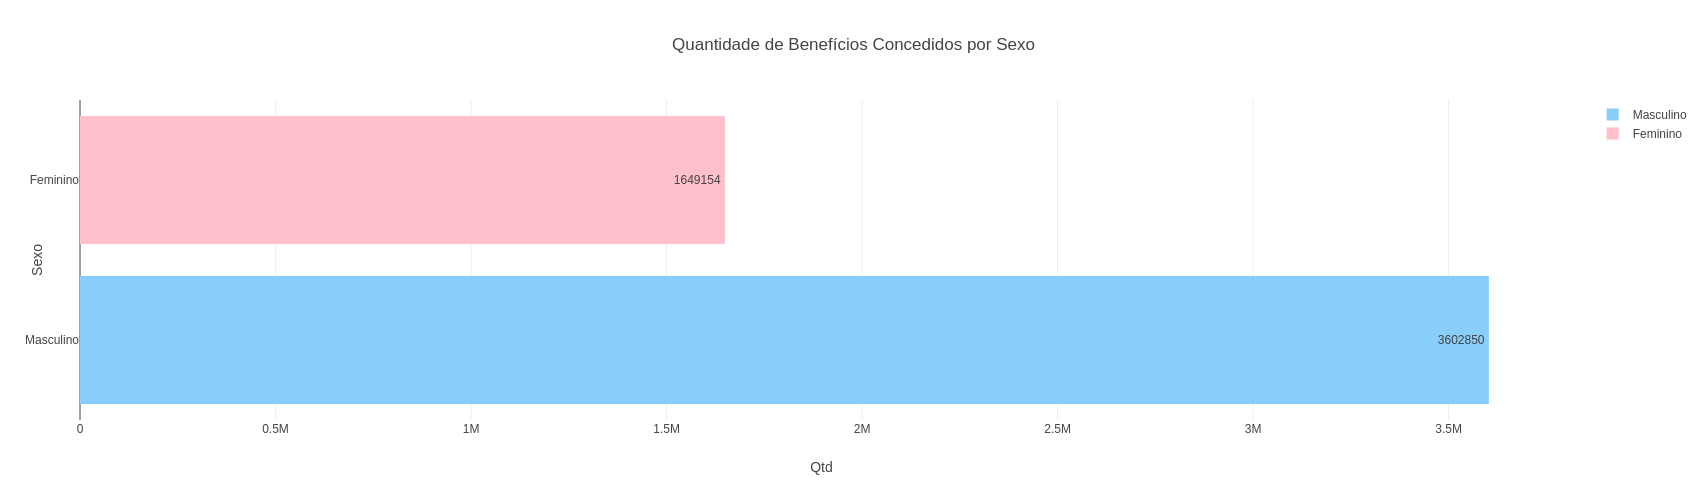

In [16]:
#  Grafico 2 - Distribuição por Sexo
masculino = df_masculino['Qte Benefícios Concedidos'].sum()
feminino = df_feminino['Qte Benefícios Concedidos'].sum()

trace0 = go.Bar(
            x = [masculino], 
            y = ['Masculino'], 
            name='Masculino',
            textposition = 'auto',
            text=[masculino],
             marker=dict(color='lightskyblue'),  
            orientation = 'h',
    )

trace1 = go.Bar(
            x = [feminino],
            y = ['Feminino'],
            name='Feminino',
            textposition = 'auto',
            text=[feminino],  
            marker=dict(color='pink'),  
            orientation = 'h',
            )

data = [trace0, trace1]
layout = go.Layout(     yaxis=dict(title='Sexo'),xaxis=dict(title='Qtd') ,title='Quantidade de Benefícios Concedidos por Sexo',autosize=False,     width=800,     height=500 )
fig = go.Figure(data=data, layout=layout, )
py.iplot(fig )

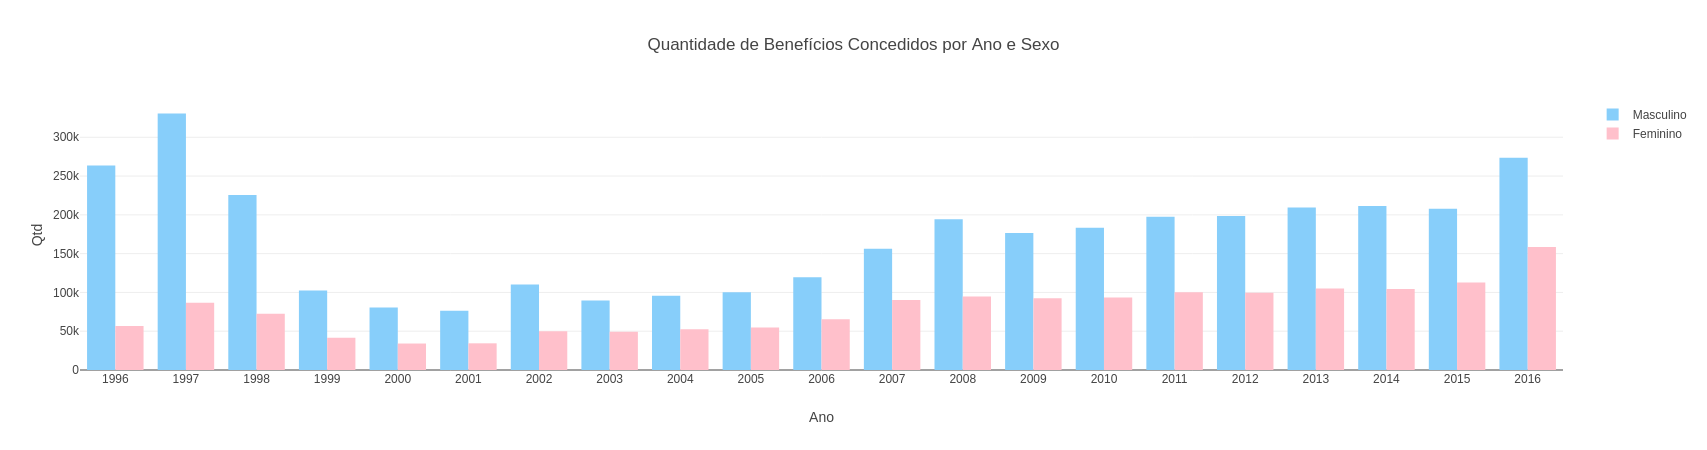

In [17]:


#  Grafico 3 - Quantidade de Benefícios Concedidos por Ano e Sexo
label1 = df_masculino['Ano'].unique()
label2 = df_feminino['Ano'].unique()
dados1 = df_masculino.groupby(['Ano']).sum()['Qte Benefícios Concedidos'].values
dados2 = df_feminino.groupby(['Ano']).sum()['Qte Benefícios Concedidos'].values

trace1 = go.Bar(
            x =label1,
            y = dados1,
            name='Masculino',
            marker=dict(color='lightskyblue'),  
            #fill='tozeroy',
            )


trace2 = go.Bar(
            x =label2, 
            y =dados2,
            name='Feminino',
            marker=dict(color='pink'),
            #fill='tozeroy',
            )


data = [trace1, trace2]
layout = go.Layout( yaxis=dict(title='Qtd'),xaxis=dict(title='Ano', tickmode='linear'),title='Quantidade de Benefícios Concedidos por Ano e Sexo')
fig = go.Figure(data=data, layout=layout, )
py.iplot(fig, filename='grouped-bar' )



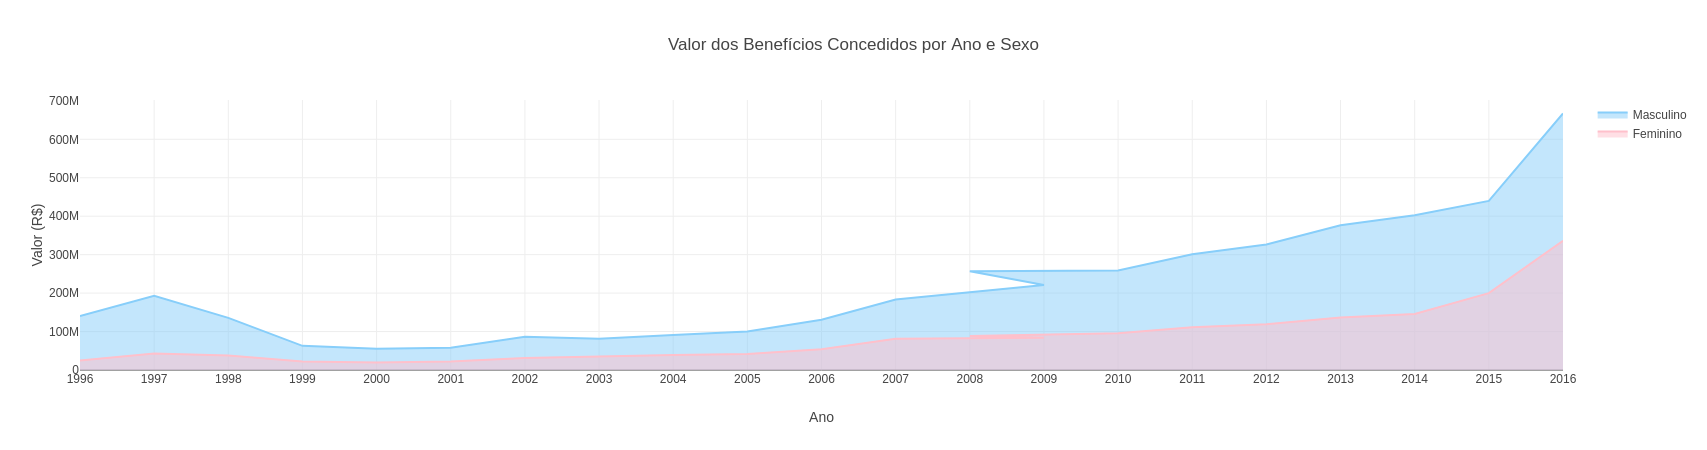

In [18]:
#  Grafico 3 - Valor de Benefícios Concedidos por Ano e Sexo
label1 = df_masculino['Ano'].unique()#df_masculino.groupby(['Ano']).sum()['Vlr Benefícios Concedidos (R$)'].index.values
label2 = df_feminino['Ano'].unique()#df_feminino.groupby(['Ano']).sum()['Vlr Benefícios Concedidos (R$)'].index.values
dados1 = df_masculino.groupby(['Ano']).sum()['Vlr Benefícios Concedidos (R$)'].values
dados2 = df_feminino.groupby(['Ano']).sum()['Vlr Benefícios Concedidos (R$)'].values

trace1 = go.Scatter(
            x =label1,
            y = dados1,
            name='Masculino',
            marker=dict(color='lightskyblue'),  
            fill='tozeroy',
            )


trace2 = go.Scatter(
            x =label2, 
            y =dados2,
            name='Feminino',
            marker=dict(color='pink'),
            fill='tozeroy',
            )


data = [trace1, trace2]
layout = go.Layout( yaxis=dict(title='Valor (R$)'),xaxis=dict(title='Ano', tickmode='linear'),title='Valor dos Benefícios Concedidos por Ano e Sexo')
fig = go.Figure(data=data, layout=layout, )
py.iplot(fig, filename='grouped-bar' )

<h3>Explorando o Atributo Clientela</h3>

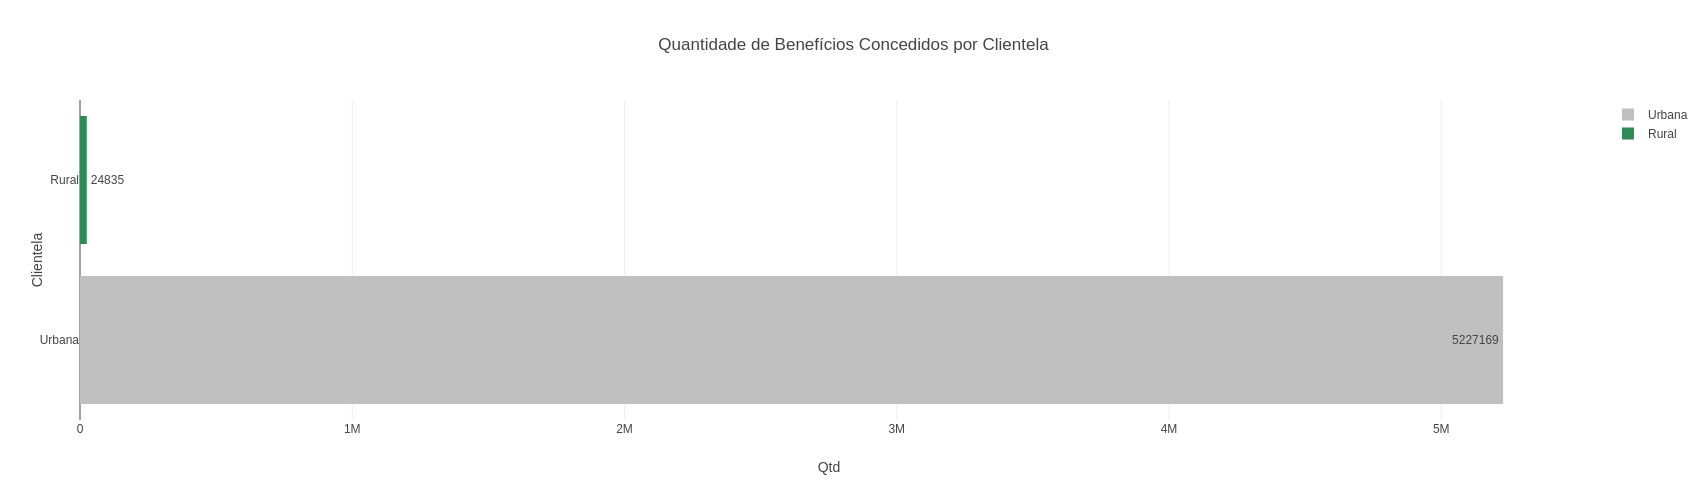

In [19]:
# Explorando o Atributo Clientela
df_urbana = df_aposentadorias[df_aposentadorias["Clientela"]== 'Urbana']
df_rural = df_aposentadorias[df_aposentadorias["Clientela"]== 'Rural']

# Grafico 1 - Distribuição por Clientela
label1 = ['Urbana']
label2 = ['Rural']
dados1 = [df_urbana['Qte Benefícios Concedidos'].sum()]
dados2 = [df_rural['Qte Benefícios Concedidos'].sum()]

trace1 = go.Bar(
            x = dados1,
            y = label1,
            name='Urbana',
            textposition = 'auto',
            text=dados1,  
            marker=dict(color='silver'),  
            orientation = 'h',
            )

trace2 = go.Bar(
            x = dados2,
            y = label2,
            name='Rural',
            textposition = 'auto',
            text=dados2,
            marker=dict(color='seagreen'), 
            orientation = 'h',
            )


data = [trace1, trace2]
layout = go.Layout(     yaxis=dict(title='Clientela') ,xaxis=dict(title='Qtd'),title='Quantidade de Benefícios Concedidos por Clientela',     autosize=False,     width=800,     height=500 )
fig = go.Figure(data=data, layout=layout, )
py.iplot(fig, filename='grouped-bar', )




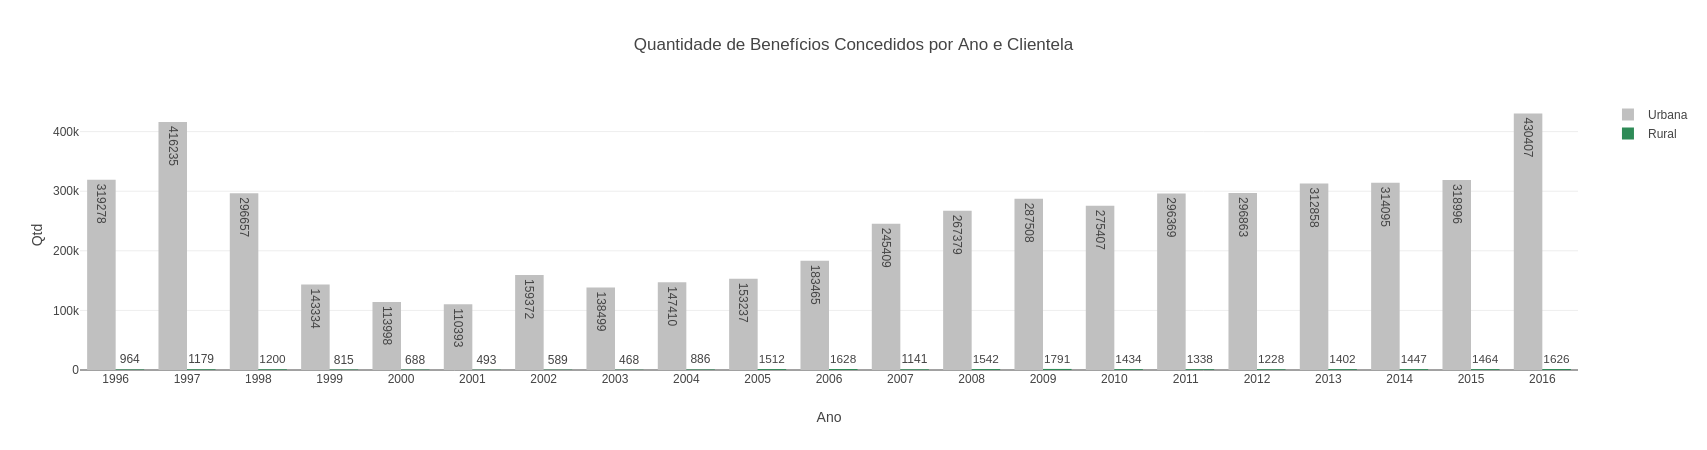

In [20]:

# Grafico 2 - Benefícios Concedidos por Ano e Clientela

label1 = df_urbana.groupby(['Ano']).sum()['Qte Benefícios Concedidos'].index.values
label2 = df_rural.groupby(['Ano']).sum()['Qte Benefícios Concedidos'].index.values
dados1 = df_urbana.groupby(['Ano']).sum()['Qte Benefícios Concedidos'].values
dados2 = df_rural.groupby(['Ano']).sum()['Qte Benefícios Concedidos'].values

trace1 = go.Bar(
            x =label1,
            y =dados1,
            name='Urbana',
            textposition = 'auto',
            text=dados1, 
            marker=dict(color='silver'),  
            
            )


trace2 = go.Bar(
            x =label2, 
            y =dados2,
            name='Rural',
            textposition = 'auto',
            text=dados2, 
            marker=dict(color='seagreen'), 
            )


data = [trace1, trace2]
layout = go.Layout(yaxis=dict(title='Qtd'),xaxis=dict(title='Ano', tickmode='linear'),title='Quantidade de Benefícios Concedidos por Ano e Clientela')
fig = go.Figure(data=data, layout=layout, )
py.iplot(fig, filename='grouped-bar' )

<h3>Explorando o Atributo "Anos de Serviço do Segurado"</h3>

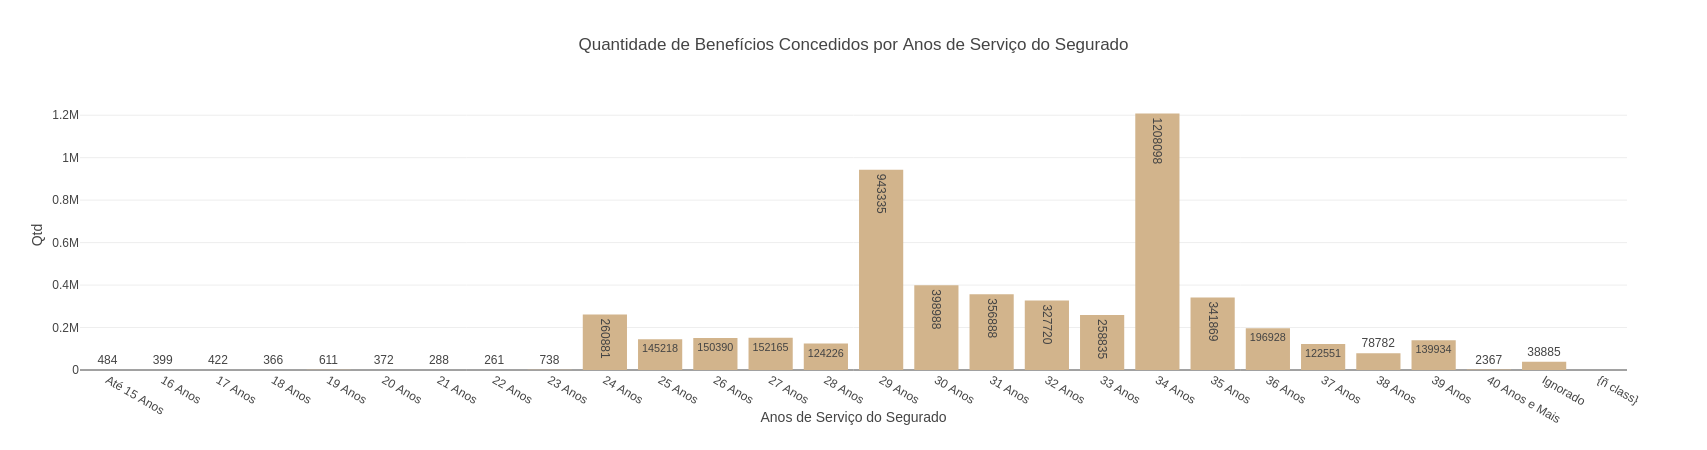

In [21]:
#Explorando o Atributo "Anos de Serviço do Segurado"
label1 = df_aposentadorias['Anos de Serviço do Segurado'].unique()
dados1 = df_aposentadorias.groupby(['Anos de Serviço do Segurado']).sum()['Qte Benefícios Concedidos']


trace1 = go.Bar(
            x =label1,
            y =dados1,
            name='Anos de Serviço do Segurado',
            textposition = 'auto',
            text=dados1, 
            marker=dict(color='tan'),  
            
            )


data = [trace1]
layout = go.Layout(yaxis=dict(title='Qtd'),xaxis=dict(title='Anos de Serviço do Segurado', tickmode='linear'),title='Quantidade de Benefícios Concedidos por Anos de Serviço do Segurado')
fig = go.Figure(data=data, layout=layout, )
py.iplot(fig, filename='grouped-bar' )


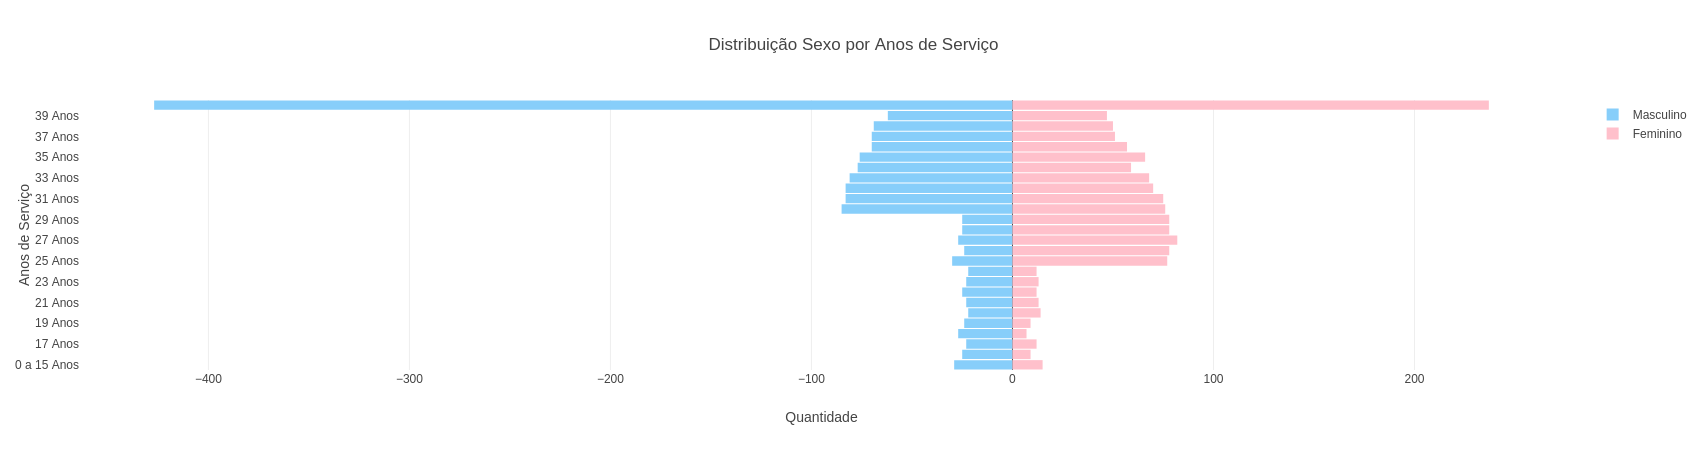

In [22]:
# Cria um dataframe e trata algumas colunas
df_beneficio = df_aposentadorias[df_aposentadorias['Qte Benefícios Concedidos'] > 0]
df_beneficio = df_beneficio[df_beneficio['Anos de Serviço do Segurado'] != 'Ignorado']
df_beneficio = df_beneficio[df_beneficio['Anos de Serviço do Segurado'] != '{ñ class}']
df_beneficio = df_beneficio.replace('Até 15 Anos', '0 a 15 Anos')

# Plota piramide da Distribuição Sexo por Anos de Serviço

label1 = df_beneficio['Anos de Serviço do Segurado'].unique()

masculino = df_beneficio[df_beneficio["Sexo"]== 'Masculino'].groupby(['Anos de Serviço do Segurado']).count()["Sexo"].values
feminino = df_beneficio[df_beneficio["Sexo"]== 'Feminino'].groupby(['Anos de Serviço do Segurado']).count()["Sexo"].values


layout = go.Layout(yaxis=go.layout.YAxis(title='Anos de Serviço'),
                   xaxis=go.layout.XAxis(title='Quantidade'),
                   barmode='overlay',
                   bargap=0.1,
                  title='Distribuição Sexo por Anos de Serviço')


trace1 = go.Bar(y = label1,
            x = masculino *-1,
            name='Masculino',
            orientation='h',
            hoverinfo='x',
            marker=dict(color='lightskyblue'),  
            )
trace2 = go.Bar(y =label1,
            x = feminino,            
            name='Feminino',
            orientation='h',
            text=-1 * dados2.astype('int'),
            hoverinfo='text',
            marker=dict(color='pink'),  
            )

data = [trace1, trace2]

py.iplot( dict(data=data, layout=layout) )

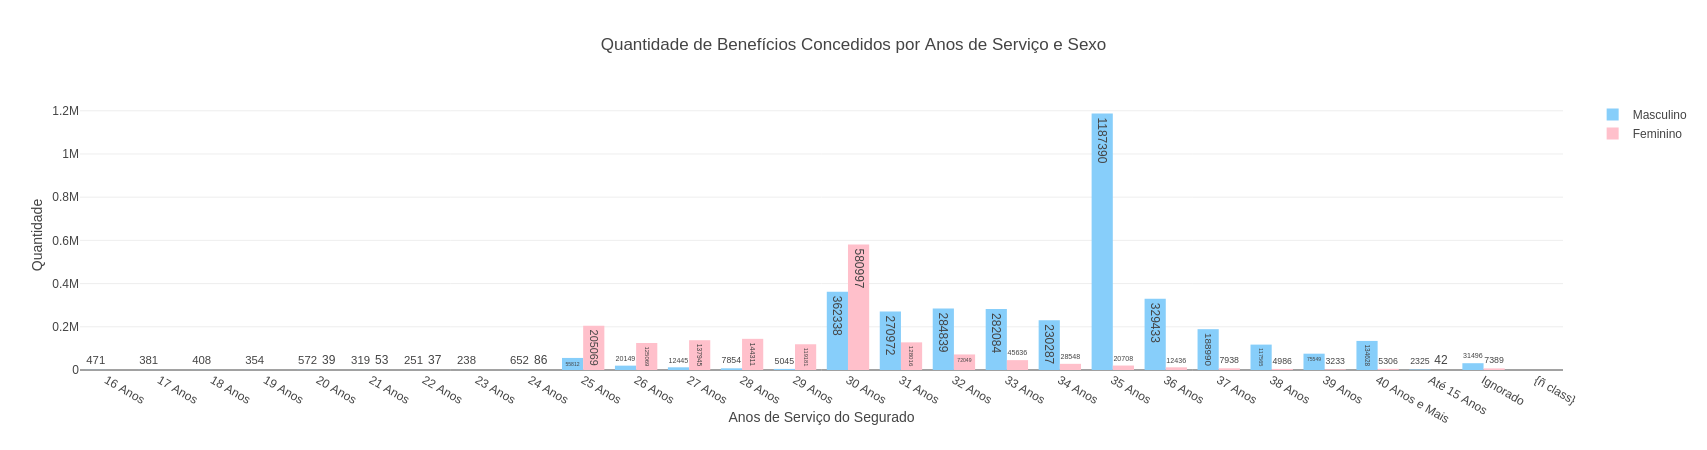

In [23]:
#Anos de Serviço do Segurado por Sexo
label1 = df_masculino.groupby(['Anos de Serviço do Segurado']).count().sort_index().index 
label2 = df_feminino.groupby(['Anos de Serviço do Segurado']).count().sort_index().index
dados1 = df_masculino.groupby(['Anos de Serviço do Segurado']).sum()['Qte Benefícios Concedidos'].values
dados2 = df_feminino.groupby(['Anos de Serviço do Segurado']).sum()['Qte Benefícios Concedidos'].values


trace1 = go.Bar(
            x = label1,
            y = dados1,
            name='Masculino',
            textposition = 'auto',
            text= dados1, 
            marker=dict(color='lightskyblue'),  
            
            )
trace2 = go.Bar(
            x = label2,
            y = dados2,
            name='Feminino',
            textposition = 'auto',
            text= dados2, 
            marker=dict(color='pink'),  
            
            )

data = [trace1, trace2]
layout = go.Layout(yaxis=dict(title='Quantidade'),xaxis=dict(title='Anos de Serviço do Segurado', tickmode='linear'),title='Quantidade de Benefícios Concedidos por Anos de Serviço e Sexo')
fig = go.Figure(data=data, layout=layout, )
py.iplot(fig, filename='grouped-bar' )


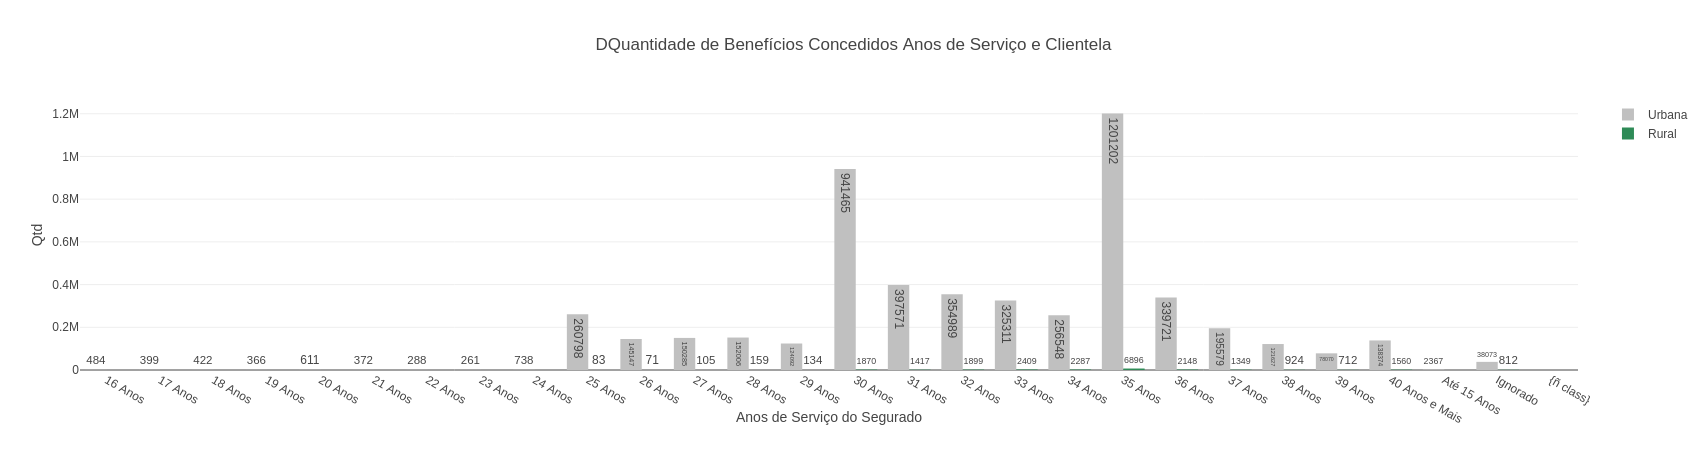

In [24]:
#Anos de Serviço do Segurado por Clientela

label1 = df_urbana.groupby(['Anos de Serviço do Segurado']).count().sort_index().index
label2 = df_rural.groupby(['Anos de Serviço do Segurado']).count().sort_index().index
dados1 = df_urbana.groupby(['Anos de Serviço do Segurado']).sum()['Qte Benefícios Concedidos'].values
dados2 = df_rural.groupby(['Anos de Serviço do Segurado']).sum()['Qte Benefícios Concedidos'].values

trace1 = go.Bar(
            x =label1,
            y =dados1,
            name='Urbana',
            textposition = 'auto',
            text=dados1,
            marker=dict(color='silver'),  
            
            )
trace2 = go.Bar(
            x = label2 ,
            y = dados2,
            name='Rural',
            textposition = 'auto',
            text=dados2,
            marker=dict(color='seagreen'),  
            
            )

data = [trace1, trace2]
layout = go.Layout(yaxis=dict(title='Qtd'),xaxis=dict(title='Anos de Serviço do Segurado', tickmode='linear'),title='DQuantidade de Benefícios Concedidos Anos de Serviço e Clientela')
fig = go.Figure(data=data, layout=layout, )
py.iplot(fig, filename='grouped-bar' )


<h3>Explorando o Atributo Espécie</h3>

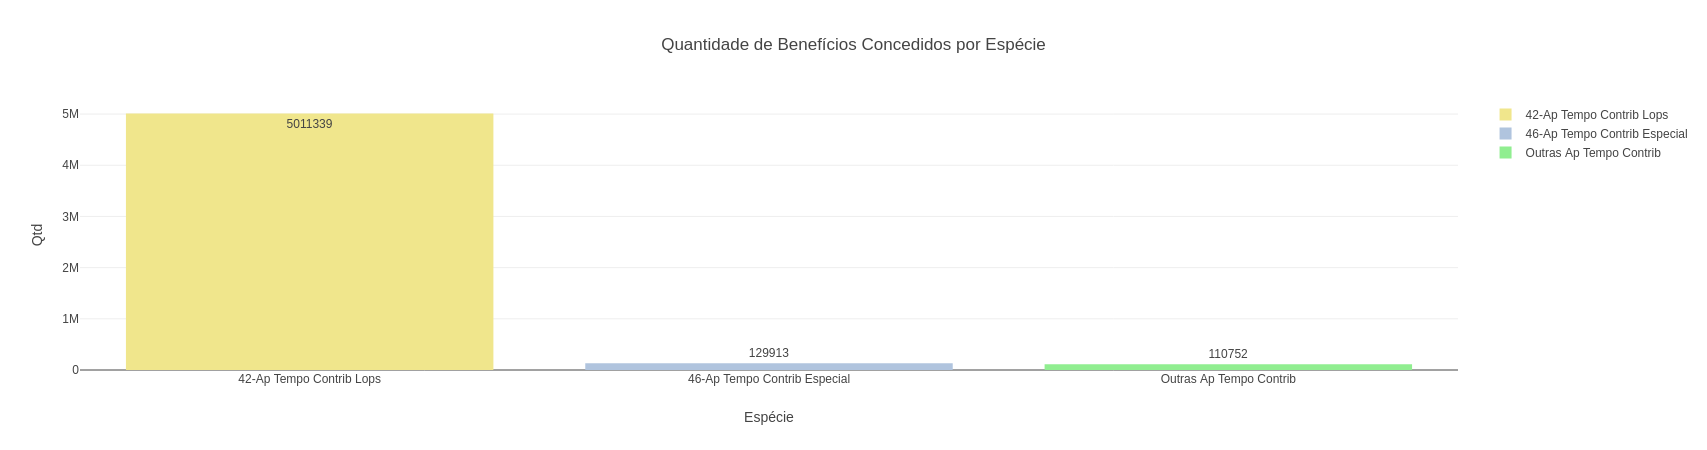

In [25]:
#Explorando o Atributo Espécie
#Distribuição Espécie
label1 = ['42-Ap Tempo Contrib Lops']
label2 = ['46-Ap Tempo Contrib Especial']
label3 = ['Outras Ap Tempo Contrib']
dados1 = [df_aposentadorias[df_aposentadorias['Espécie']== '42-Ap Tempo Contrib Lops']['Qte Benefícios Concedidos'].sum()]
dados2 = [df_aposentadorias[df_aposentadorias['Espécie']== '46-Ap Tempo Contrib Especial']['Qte Benefícios Concedidos'].sum()]
dados3 = [df_aposentadorias[df_aposentadorias['Espécie']== 'Outras Ap Tempo Contrib']['Qte Benefícios Concedidos'].sum()]

trace1 = go.Bar(
            x = label1,
            y = dados1,
            name='42-Ap Tempo Contrib Lops',
            textposition = 'auto',
            text= dados1,
            marker=dict(color='khaki'),  
            
            )

trace2 = go.Bar(
            x =label2,
            y =dados2,
            name='46-Ap Tempo Contrib Especial',
            textposition = 'auto',
            text=dados2,
            marker=dict(color='lightsteelblue'),  
            
            )

trace3 = go.Bar(
            x =label3 ,
            y =dados3,
            name='Outras Ap Tempo Contrib',
            textposition = 'auto',
            text=dados3,
            marker=dict(color='lightgreen'),  
            
            )


data = [trace1, trace2, trace3]
layout = go.Layout(yaxis=dict(title='Qtd'),xaxis=dict(title='Espécie', tickmode='linear'),title='Quantidade de Benefícios Concedidos por Espécie')
fig = go.Figure(data=data, layout=layout, )
py.iplot(fig, filename='grouped-bar' )

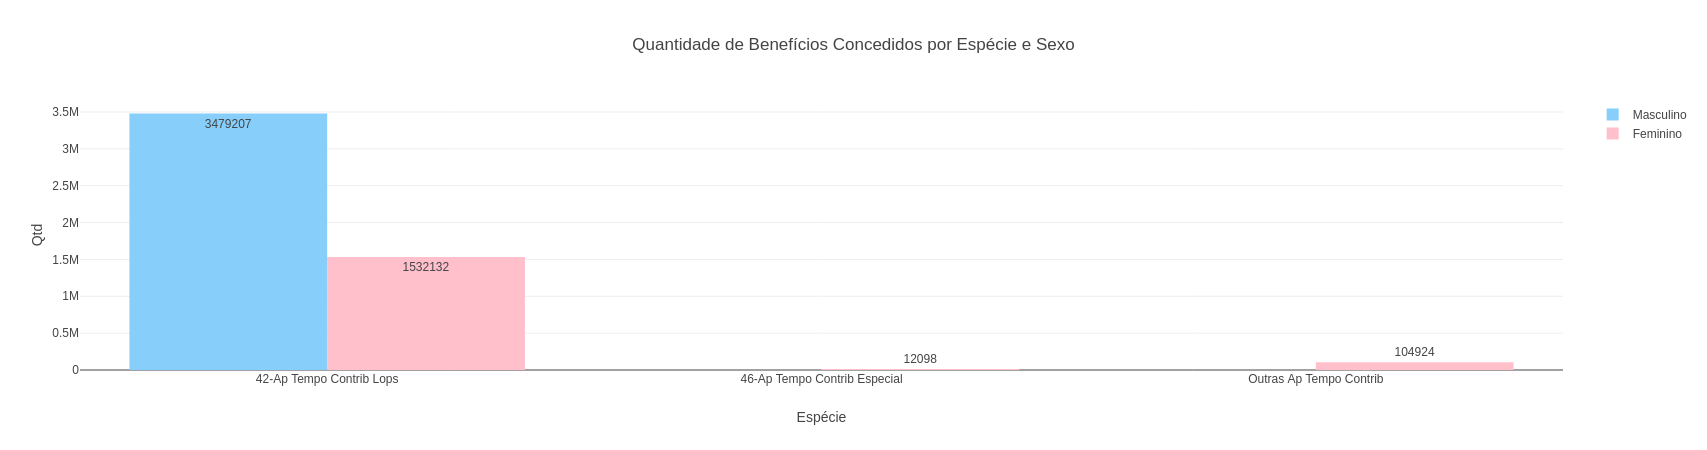

In [26]:
#Distribuição da Espécie por Sexo
label = df_masculino['Espécie'].unique()
label2 = df_feminino['Espécie'].unique()
dados1 = df_masculino.groupby(['Espécie']).sum()['Qte Benefícios Concedidos'].values
dados2 = df_feminino.groupby(['Espécie']).sum()['Qte Benefícios Concedidos'].values


trace1 = go.Bar(
            x = label1,
            y = dados1,
            name='Masculino',
            textposition = 'auto',
            text=dados1, 
            marker=dict(
            color='lightskyblue'),  
            
            )
trace2 = go.Bar(
            x =label2,
            y = dados2 ,
            name='Feminino',
            textposition = 'auto',
            text=dados2, 
            marker=dict(color='pink'),  
            
            )

data = [trace1, trace2]
layout = go.Layout(yaxis=dict(title='Qtd'),xaxis=dict(title='Espécie', tickmode='linear'),title='Quantidade de Benefícios Concedidos por Espécie e Sexo')
fig = go.Figure(data=data, layout=layout, )
py.iplot(fig, filename='grouped-bar' )


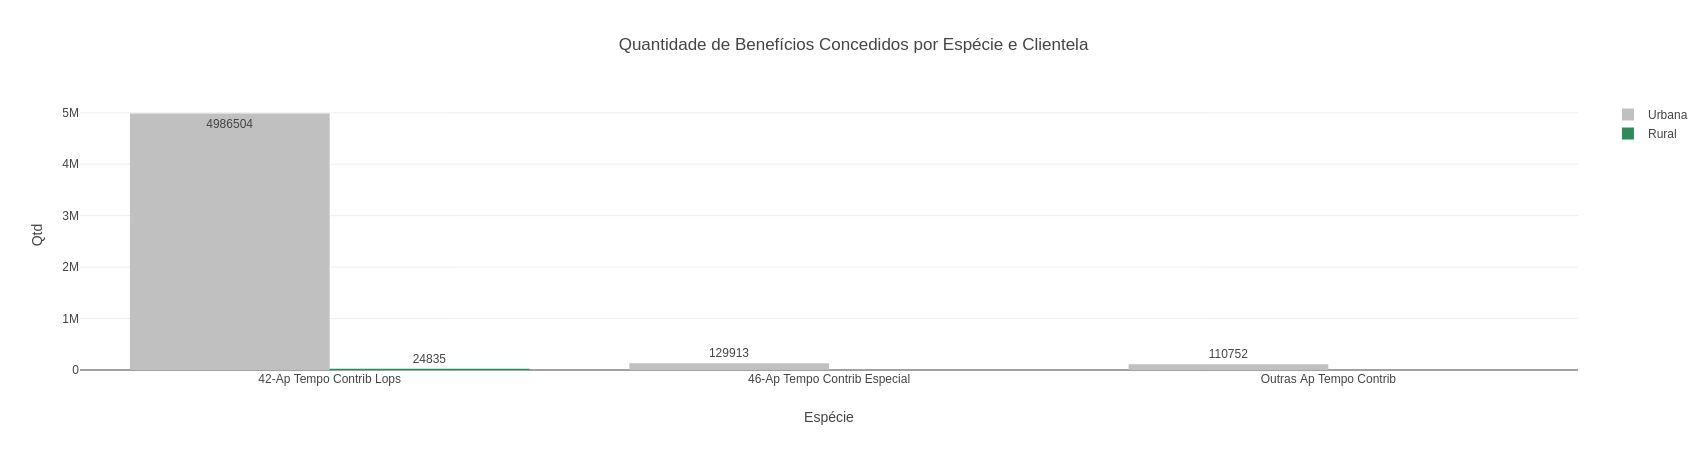

In [27]:
#Distribuição da Espécie por Clientela

label1 = df_urbana['Espécie'].unique()
label2 = df_rural['Espécie'].unique()
dados1 = df_urbana.groupby(['Espécie']).sum()['Qte Benefícios Concedidos'].values
dados2 = df_rural.groupby(['Espécie']).sum()['Qte Benefícios Concedidos'].values

trace1 = go.Bar(
            x = label1,
            y = dados1,
            name='Urbana',
            textposition = 'auto',
            text= dados1,
            marker=dict(color='silver'),  
            
            )
trace2 = go.Bar(
            x = label2,
            y = dados2,
            name='Rural',
            textposition = 'auto',
            text= dados2,
            marker=dict(color='seagreen'),  
            
            )

data = [trace1, trace2]
layout = go.Layout(barmode='group',yaxis=dict(title='Qtd'),xaxis=dict(title='Espécie', tickmode='linear'),title='Quantidade de Benefícios Concedidos por Espécie e Clientela')
fig = go.Figure(data=data, layout=layout, )
py.iplot(fig, filename='grouped-bar' )


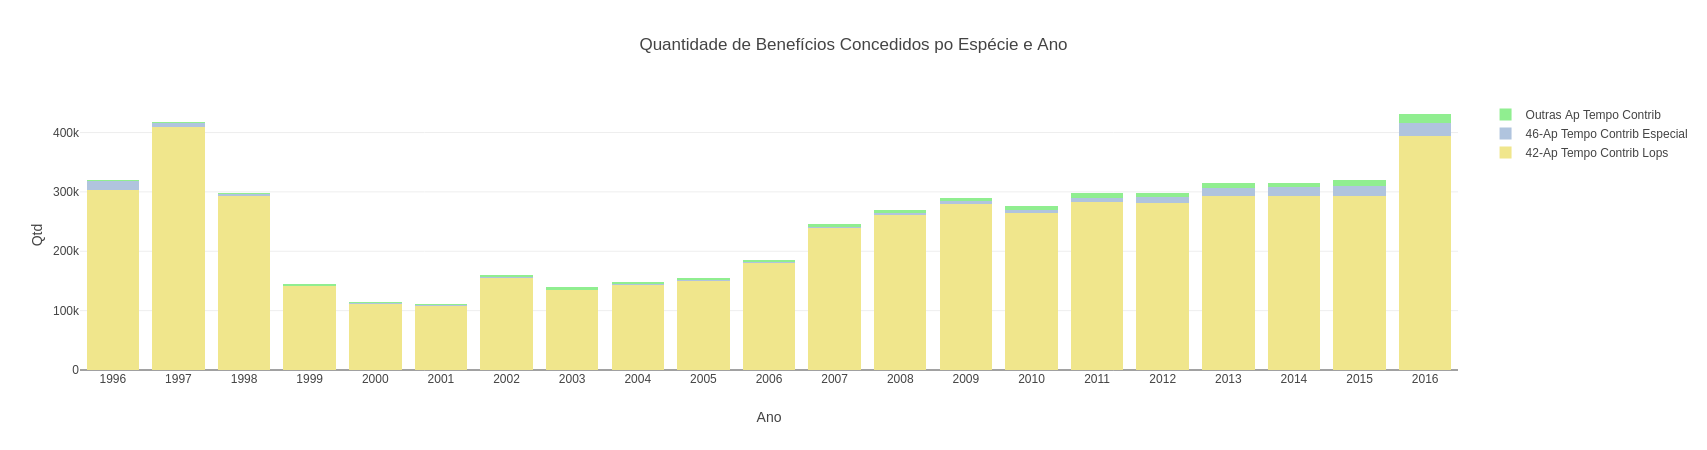

In [28]:
# Distribuição da Espécie por Ano

label1 = df_aposentadorias[df_aposentadorias['Espécie']== '42-Ap Tempo Contrib Lops'].groupby(['Ano']).sum()['Qte Benefícios Concedidos'].index.values
label2 = df_aposentadorias[df_aposentadorias['Espécie']== '46-Ap Tempo Contrib Especial'].groupby(['Ano']).sum()['Qte Benefícios Concedidos'].index.values 
label3 = df_aposentadorias[df_aposentadorias['Espécie']== 'Outras Ap Tempo Contrib'].groupby(['Ano']).sum()['Qte Benefícios Concedidos'].index.values
dados1 = df_aposentadorias[df_aposentadorias['Espécie']== '42-Ap Tempo Contrib Lops'].groupby(['Ano']).sum()['Qte Benefícios Concedidos'].values
dados2 = df_aposentadorias[df_aposentadorias['Espécie']== '46-Ap Tempo Contrib Especial'].groupby(['Ano']).sum()['Qte Benefícios Concedidos'].values
dados3 = df_aposentadorias[df_aposentadorias['Espécie']== 'Outras Ap Tempo Contrib'].groupby(['Ano']).sum()['Qte Benefícios Concedidos'].values

trace1 = go.Bar(
            x = label1,
            y = dados1,
            name='42-Ap Tempo Contrib Lops',
            #textposition = 'auto',
            #text= dados1,
            marker=dict(color='khaki'),  
            
            )

trace2 = go.Bar(
             x = label2,
            y = dados2,
            name='46-Ap Tempo Contrib Especial',
            #textposition = 'auto',
            #text=dados2,
            marker=dict(color='lightsteelblue'),  
            
            )

trace3 = go.Bar(
             x =label3,
            y = dados3,
            name='Outras Ap Tempo Contrib',
            #textposition = 'auto',
            #text=dados3,
            marker=dict(color='lightgreen'),  
            
            )

data = [trace1, trace2, trace3]
layout = go.Layout(barmode='stack', yaxis=dict(title='Qtd'),xaxis=dict(title='Ano', tickmode='linear'),title='Quantidade de Benefícios Concedidos po Espécie e Ano')
fig = go.Figure(data=data, layout=layout, )
py.iplot(fig, filename='grouped-bar' )